# Customer Churn Risk Prediction Case Study

## Importing Important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

import warnings
warnings.simplefilter("ignore")

## Importing data

In [2]:
df1 = pd.read_csv('Churn History Dataset.csv')
df2 = pd.read_csv('Churn Test Dataset.csv')


# I. Exploratory data Analysis

In [3]:
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [4]:
df1.rename(columns = {'Y_var':'Churn Indicator'}, inplace = True)

In [5]:
df1.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3332.000000,3332.000000,3331.000000,3333.000000,3332.000000,3333.000000,3331.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,190.740294,103.218788,101.768574,201.005734,100.343834,17.085633,201.808803,100.373762,16.062715,10.523132,4.488749,13.128689,1.572757
std,39.822106,42.371290,13.688365,598.879213,128.891770,4025.094680,50.709102,23.781417,4.309621,75.438537,24.880650,405.568376,12.241776,2.513638,598.319452,1.430420
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.600000,114.000000,36.825000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,34545.000000,7100.000000,232343.000000,363.700000,850.000000,30.910000,3434.340000,987.000000,23423.000000,600.600000,34.000000,34545.000000,34.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

In [7]:
df_check = df1.copy()

In [8]:
df_check.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


### Null value handling

In [9]:
df1.fillna(0,inplace = True)

In [10]:
df1.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn Indicator                  0
dtype: int64

## Visualization

<AxesSubplot:>

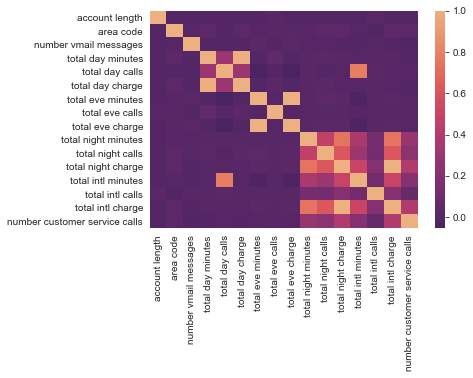

In [11]:
sns.heatmap(df1.corr(),cmap='flare_r')


<AxesSubplot:xlabel='Churn Indicator', ylabel='count'>

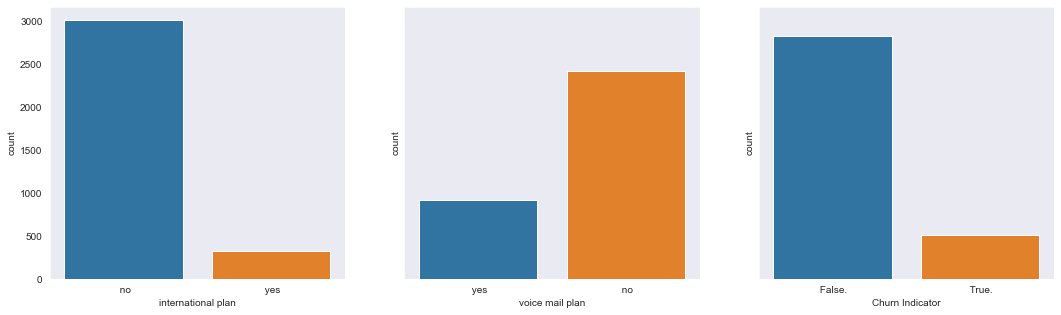

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,5 ), sharey=True)
sns.countplot("international plan", data=df1, ax=axes[0])
sns.countplot("voice mail plan", data=df1, ax=axes[1])
sns.countplot("Churn Indicator", data=df1, ax=axes[2])

In [14]:
df1['Churn Indicator'].value_counts()

 False.    2829
 True.      504
Name: Churn Indicator, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

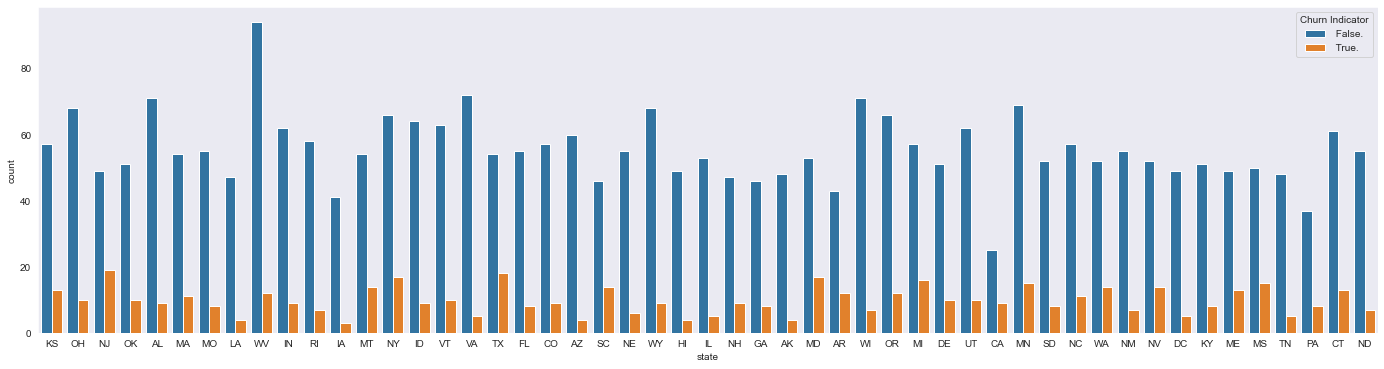

In [15]:
plt.figure(figsize = (24,6))
sns.countplot(x = "state", hue = 'Churn Indicator',  data = df1)

<AxesSubplot:xlabel='area code', ylabel='count'>

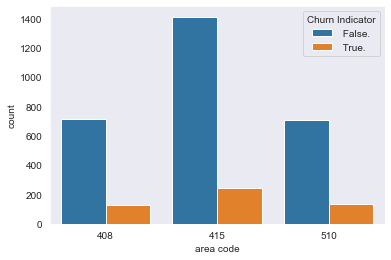

In [16]:
sns.countplot(x = 'area code',hue='Churn Indicator', data = df1 )

<AxesSubplot:xlabel='number customer service calls', ylabel='count'>

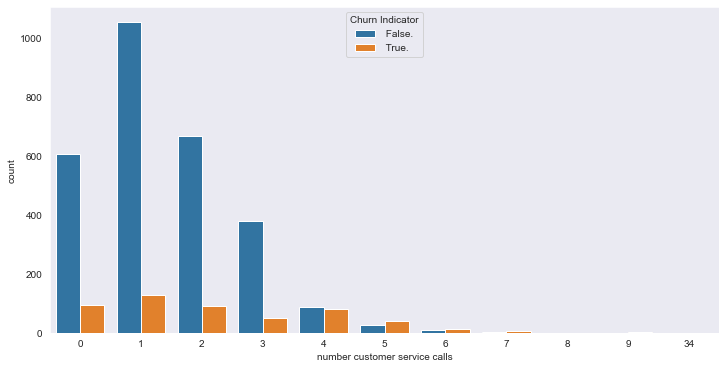

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'number customer service calls',hue='Churn Indicator', data = df1 )

<AxesSubplot:xlabel='total intl calls', ylabel='count'>

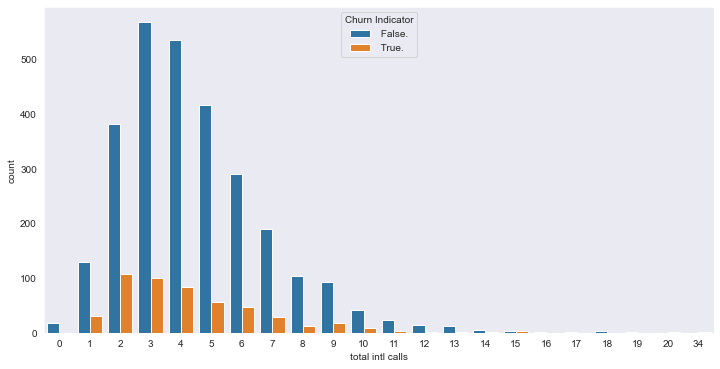

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'total intl calls',hue='Churn Indicator', data = df1 )

<AxesSubplot:xlabel='number vmail messages', ylabel='count'>

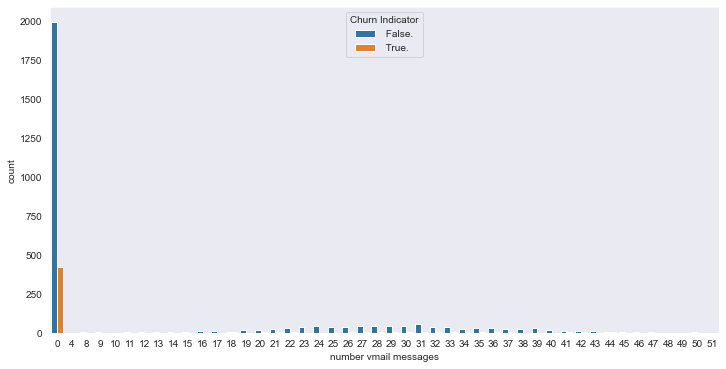

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'number vmail messages',hue='Churn Indicator', data = df1 )

In [20]:
print(df1.nunique())
df1.info()

state                              51
account length                    212
area code                           3
phone number                     3333
international plan                  2
voice mail plan                     2
number vmail messages              46
total day minutes                1669
total day calls                   121
total day charge                 1669
total eve minutes                1611
total eve calls                   124
total eve charge                 1440
total night minutes              1591
total night calls                 122
total night charge                933
total intl minutes                164
total intl calls                   22
total intl charge                 163
number customer service calls      11
Churn Indicator                     2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------           

<AxesSubplot:xlabel='total day charge', ylabel='Density'>

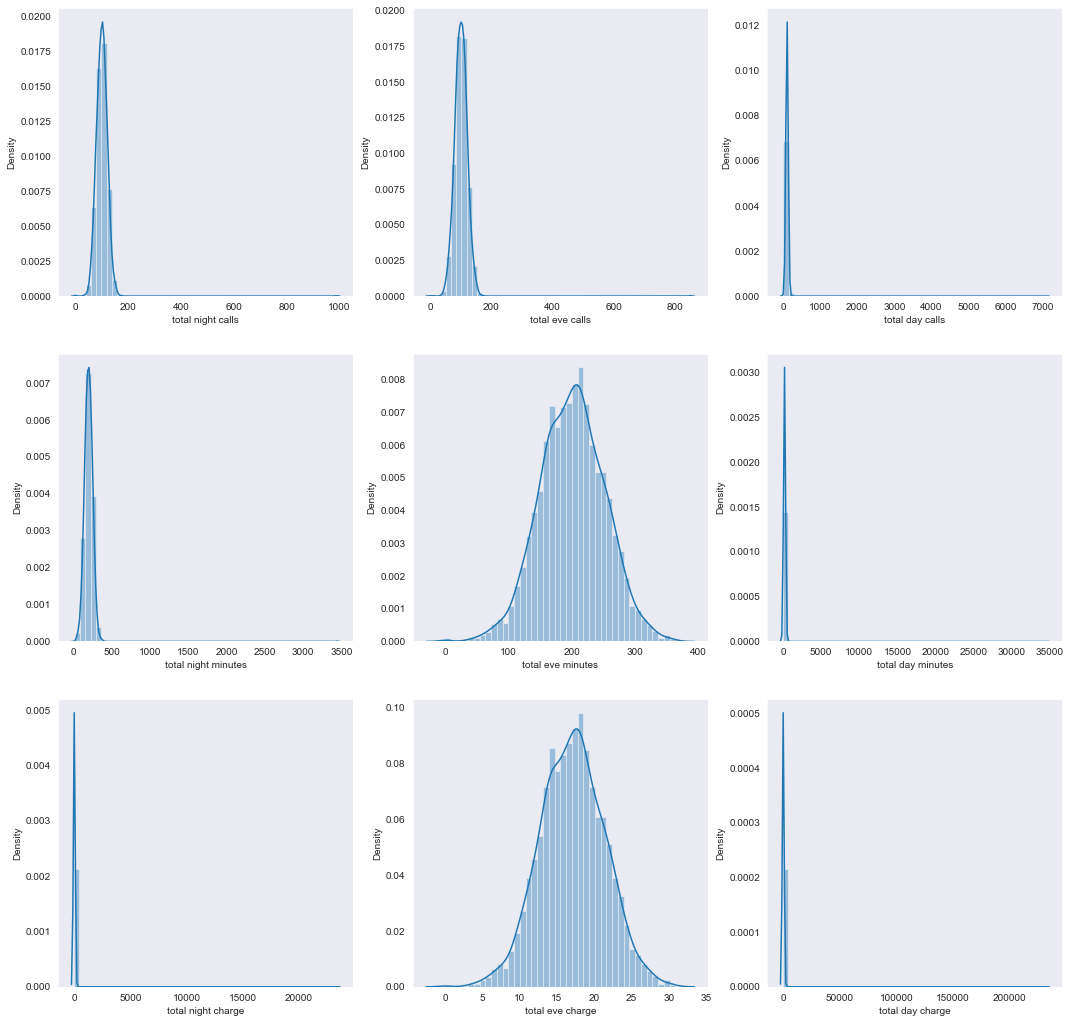

In [21]:
fig, axes = plt.subplots(3,3, figsize=(18, 18))

sns.distplot(df1["total night calls"], ax=axes[0,0])
sns.distplot(df1["total eve calls"], ax=axes[0,1])
sns.distplot(df1["total day calls"], ax=axes[0,2])

sns.distplot(df1["total night minutes"], ax=axes[1,0])
sns.distplot(df1["total eve minutes"], ax=axes[1,1])
sns.distplot(df1["total day minutes"], ax=axes[1,2])

sns.distplot(df1["total night charge"], ax=axes[2,0])
sns.distplot(df1["total eve charge"], ax=axes[2,1])
sns.distplot(df1["total day charge"], ax=axes[2,2])

### one peculiar thing that we can note from above heatmaps and distplots that the bunch of three variable "calls", "minutes", and "charge" for all three time of a day are highly correlated. We can turn them into a single column which can provide useful information of all 3 variables at a time. For this we can add the charges, call, minute and name this to charge, call, minute respectively.

In [22]:
df1_copy = df1


In [23]:
# df1_copy.rename(columns = {'Y_var':'Churn Indicator'}, inplace = True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1_copy['international plan'] = le.fit_transform(df1_copy['international plan'])
df1_copy['voice mail plan'] = le.fit_transform(df1_copy['voice mail plan'])
df1_copy['state'] = le.fit_transform(df1_copy['state'])
df1_copy['Churn Indicator'] = le.fit_transform(df1_copy['Churn Indicator'])
df1['phone number'] = df1['phone number'].str.replace('-','').astype(int)
df1_copy 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,16,128,415,3824657,0,1,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0
1,35,107,415,3717191,0,1,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0
2,31,137,415,3581921,0,0,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0
3,35,84,408,3759999,1,0,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,0
4,36,75,415,3306626,1,0,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,4144276,0,1,36,156.2,77.0,26.55,...,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,0
3329,49,68,415,3703271,0,0,0,231.1,57.0,39.29,...,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,0
3330,39,28,510,3288230,0,0,0,180.8,109.0,30.74,...,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,0
3331,6,184,510,3646381,1,0,0,213.8,105.0,36.35,...,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,1


In [25]:
df1_copy['total minutes'] = df1_copy['total day minutes'] + df1_copy['total eve minutes'] + df1_copy['total night minutes']
df1_copy['total calls'] =   df1_copy['total day calls'] +   df1_copy['total eve calls'] +   df1_copy['total night calls']
df1_copy['total charge'] =  df1_copy['total day charge'] +  df1_copy['total eve charge'] +  df1_copy['total night charge']

df1_copy.drop(columns= ['total day charge', 'total eve charge', 'total night charge',
                        'total day calls',  'total eve calls',  'total night calls', 
                        'total day minutes','total eve minutes','total night minutes',
                        ], inplace= True)

In [26]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   int32  
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   int32  
 4   international plan             3333 non-null   int32  
 5   voice mail plan                3333 non-null   int32  
 6   number vmail messages          3333 non-null   int64  
 7   total intl minutes             3333 non-null   float64
 8   total intl calls               3333 non-null   int64  
 9   total intl charge              3333 non-null   float64
 10  number customer service calls  3333 non-null   int64  
 11  Churn Indicator                3333 non-null   int32  
 12  total minutes                  3333 non-null   f

In [27]:
df1_copy[['international plan','Churn Indicator','voice mail plan']].groupby('Churn Indicator').sum()

,international plan,voice mail plan
Churn Indicator,,
0,165,837
1,158,85


In [28]:
df1_copy.corr()['Churn Indicator']

state                            0.008761
account length                   0.021987
area code                        0.015084
phone number                     0.005100
international plan               0.309010
voice mail plan                 -0.101883
number vmail messages           -0.089270
total intl minutes               0.029362
total intl calls                -0.033432
total intl charge                0.041127
number customer service calls    0.212751
Churn Indicator                  1.000000
total minutes                    0.027307
total calls                      0.005124
total charge                    -0.002007
Name: Churn Indicator, dtype: float64

### checking for multicollinearity between features

<AxesSubplot:>

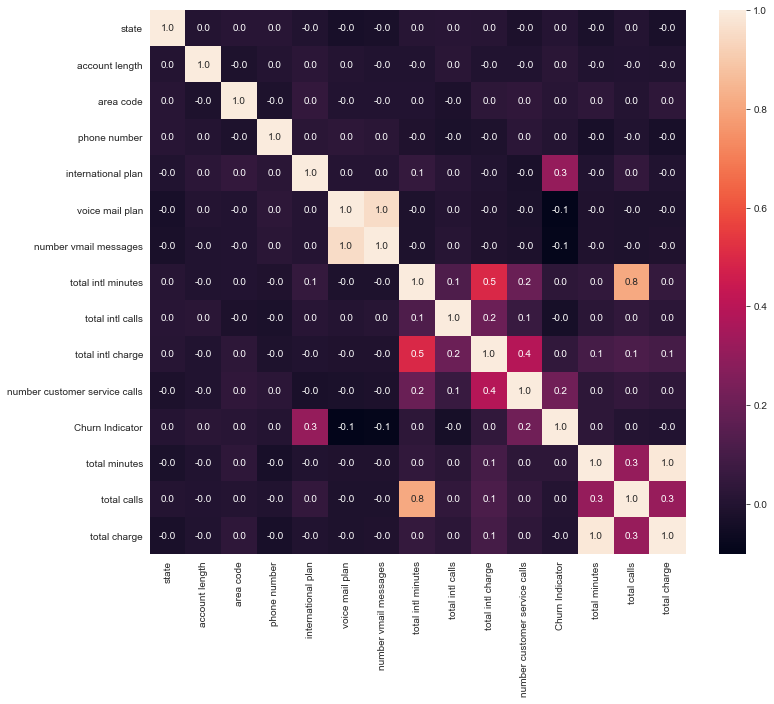

In [29]:
plt.figure(figsize = (12,10))
sns.heatmap(df1_copy.corr(), annot = True, fmt = '1.1f')

<AxesSubplot:>

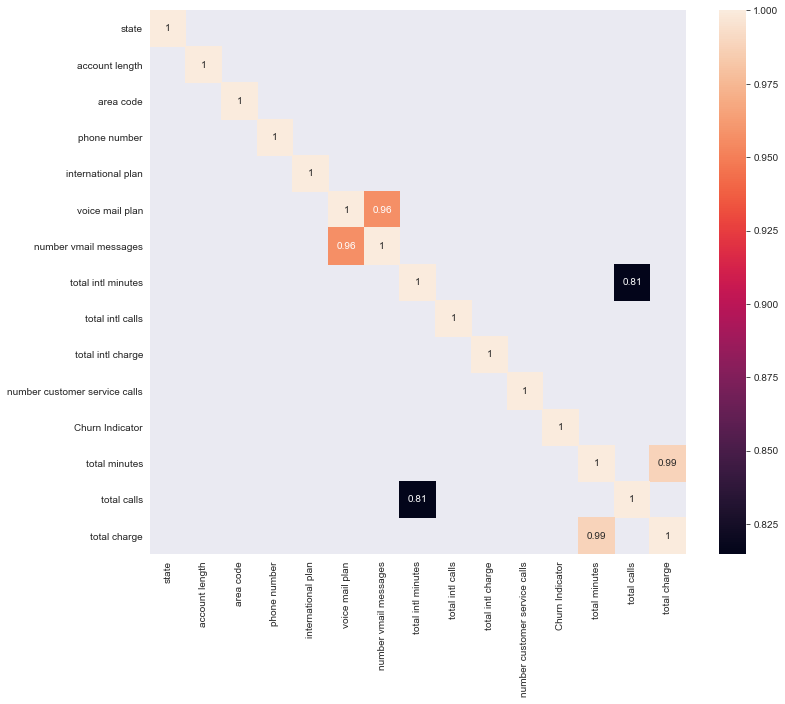

In [30]:
df_corr = df1_copy.corr()[df1_copy.corr()>=0.7]
df_corr
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True)

In [31]:
# dropping columns having high positive correlation
# "total International minutes" and "voice mail plan"
df1_copy.drop(["total intl minutes",
               "voice mail plan"],axis = 1, inplace = True)

In [32]:
df1_copy.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'number vmail messages', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn Indicator',
       'total minutes', 'total calls', 'total charge'],
      dtype='object')

### also the columns  'total minutes' and  'total charge' are in high correlation hence we add a column named "total charge per minute" which is total charge divided by total minutes

In [33]:
df1_copy[ "total charge per minute"] = df1_copy['total charge'] / df1_copy['total minutes'] 

In [34]:
df1_copy.head()

,state,account length,area code,phone number,international plan,number vmail messages,total intl calls,total intl charge,number customer service calls,Churn Indicator,total minutes,total calls,total charge,total charge per minute
0,16,128,415,3824657,0,25,3,2.70,1,0,707.2,300.0,72.86,0.103026
1,35,107,415,3717191,0,26,3,3.70,1,0,611.5,329.0,55.54,0.090826
2,31,137,415,3581921,0,0,5,3.29,0,0,527.2,328.0,59.00,0.111912
3,35,84,408,3759999,1,0,7,1.78,2,0,558.2,7277.0,1515.02,2.714117
4,36,75,415,3306626,1,0,3,2.73,3,0,501.9,356.0,49.36,0.098346


In [35]:
df1_copy.drop(["total minutes",
               "total charge"],axis = 1, inplace = True)

<AxesSubplot:>

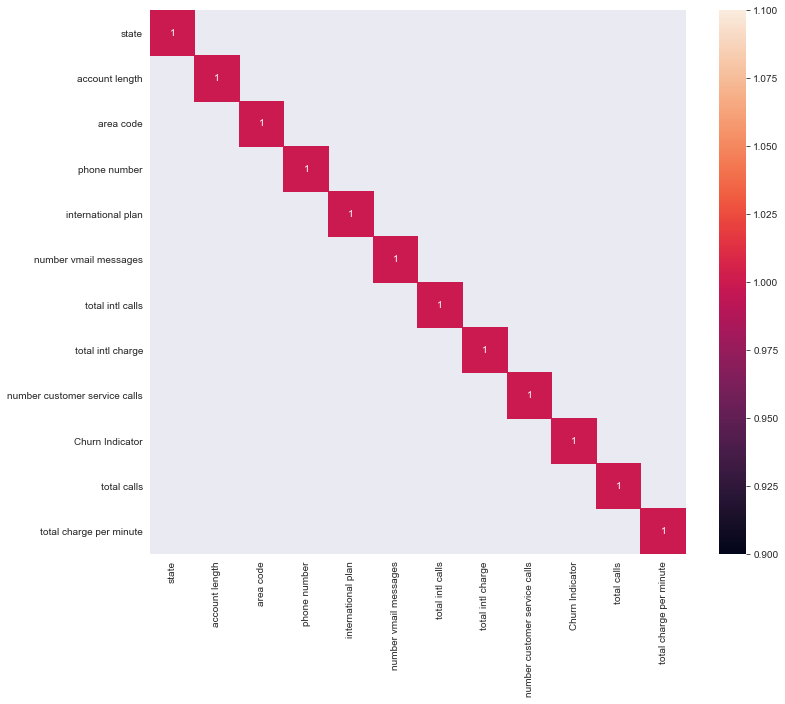

In [36]:
df_corr = df1_copy.corr()[df1_copy.corr()>=0.7]
df_corr
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True)

### handling outliers

In [37]:
df_copy = df1_copy.copy()

In [38]:
df_copy.nunique()

state                              51
account length                    212
area code                           3
phone number                     3333
international plan                  2
number vmail messages              46
total intl calls                   22
total intl charge                 163
number customer service calls      11
Churn Indicator                     2
total calls                       194
total charge per minute          3328
dtype: int64

In [39]:
df_copy.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'number vmail messages', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn Indicator',
       'total calls', 'total charge per minute'],
      dtype='object')

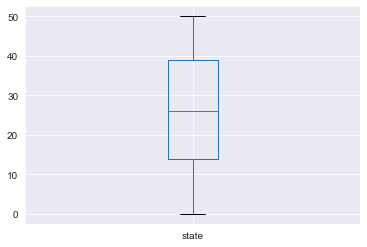

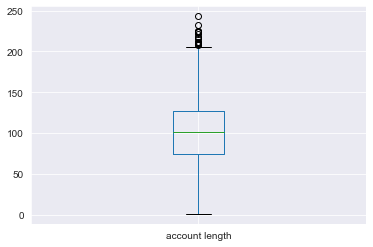

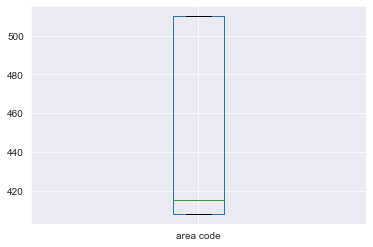

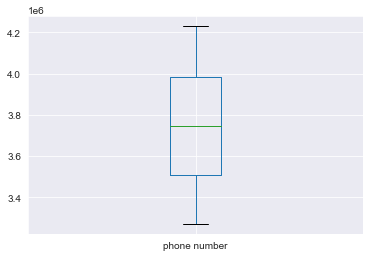

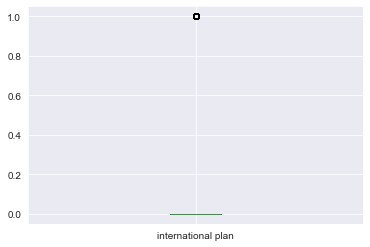

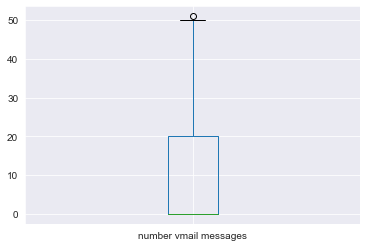

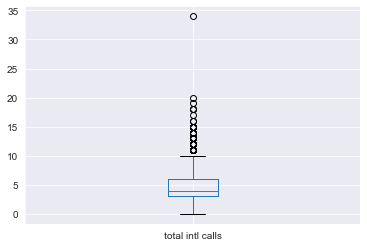

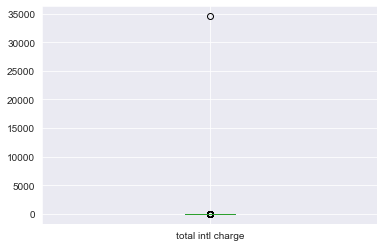

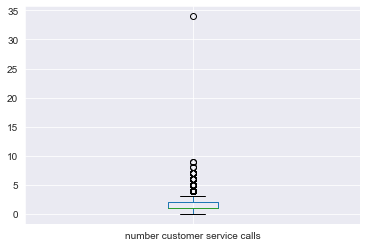

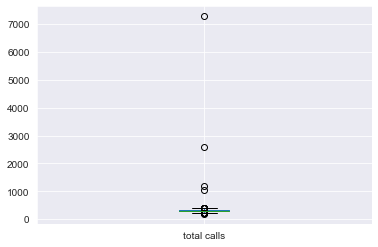

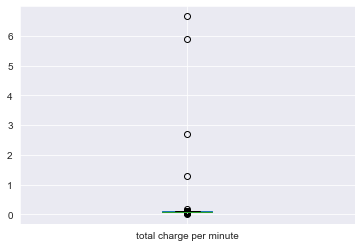

In [40]:
outlier = [ 'state', 'account length', 'area code', 'phone number',
            'international plan', 'number vmail messages', 'total intl calls',
            'total intl charge', 'number customer service calls',
            'total calls', 'total charge per minute' ]
# sns.catplot(data = df_copy, y= 'total day minutes', kind = 'box')
for i in outlier:
    df_copy.boxplot(i)
    plt.show()

In [41]:
for l in outlier:
    q75,q25 = np.percentile(df_copy.loc[:,l],[75,25])
    intr_qr = q75-q25
 
    maxx = q75+(1.5*intr_qr)
    minn = q25-(1.5*intr_qr)
 
    df_copy.loc[df_copy[l] < minn,l] = minn
    df_copy.loc[df_copy[l] > maxx,l] = maxx 
    

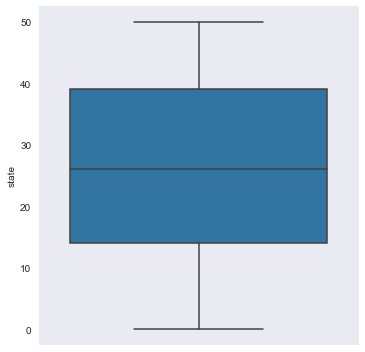

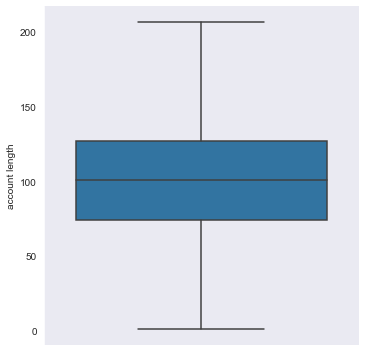

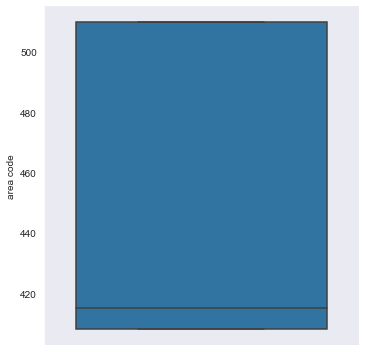

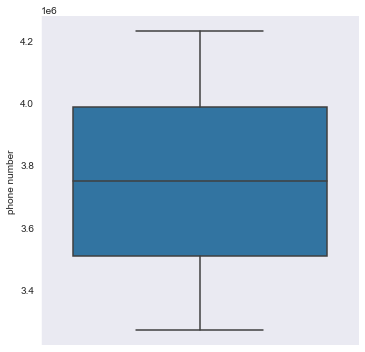

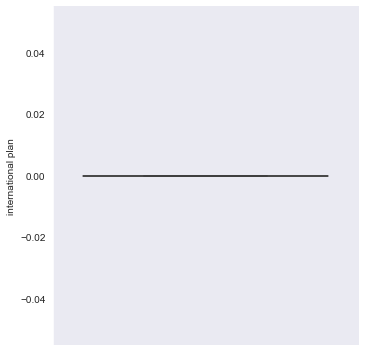

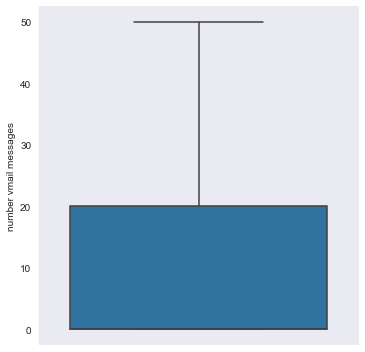

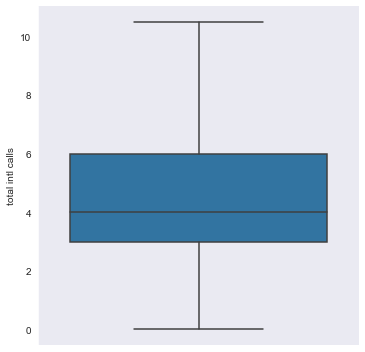

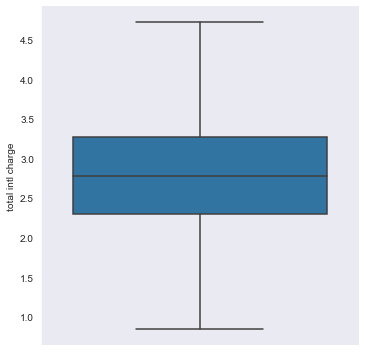

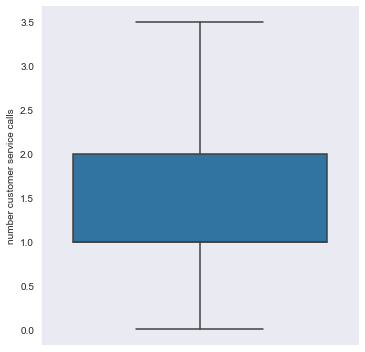

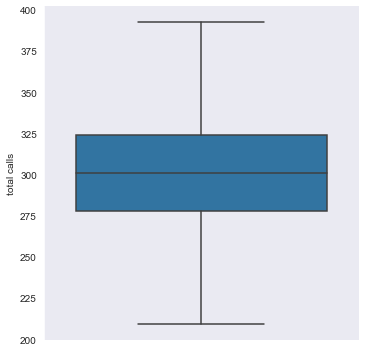

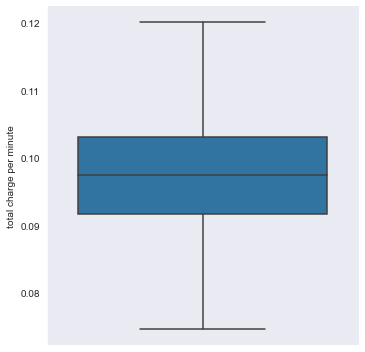

In [42]:
for i in outlier:
    sns.catplot(data = df_copy, y= i, kind = 'box')
    plt.show()


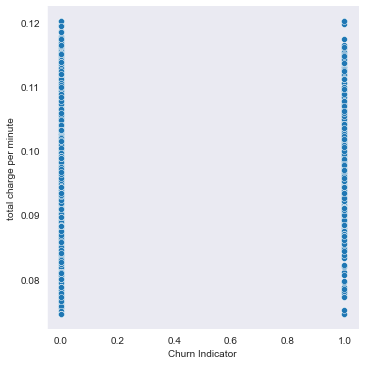

In [43]:
sns.relplot( x = 'Churn Indicator', y = 'total charge per minute', data = df_copy)

In [44]:
df_check.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


## Function for cleaning the test and train data at once

In [45]:
def compact(df1):
    
    # rectifying area_code column 
    df1['international plan'] = le.fit_transform(df1['international plan'])
    df1['voice mail plan'] =    le.fit_transform(df1['voice mail plan'])
    df1['state'] =              le.fit_transform(df1['state'])
    df1['Churn Indicator'] =    le.fit_transform(df1['Churn Indicator'])
    df1['phone number'] =       df1['phone number'].str.replace('-','').astype(int)
    df1 
    # compacting the data
    df1['total minutes'] = df1['total day minutes'] + df1['total eve minutes'] + df1['total night minutes']
    df1['total calls'] =   df1['total day calls'] +   df1['total eve calls'] +   df1['total night calls']
    df1['total charge'] =  df1['total day charge'] +  df1['total eve charge'] +  df1['total night charge']

    
    df1.drop(columns= ['total day charge', 'total eve charge', 'total night charge',
                       'total day calls',  'total eve calls',  'total night calls', 
                       'total day minutes','total eve minutes','total night minutes',
                      ], inplace= True)
    
    # dropping columns having high positive correlation i.e. "total International minutes" and "voice mail plan"
    df1.drop(["total intl minutes", "voice mail plan"],axis = 1, inplace = True)
    
    df1[ "total charge per minute"] = df1['total charge'] / df1['total minutes']
    df1.drop(["total minutes", "total charge"],axis = 1, inplace = True)
    
    # handling null values
    df1.fillna(0, inplace = True)
    
    # outlier detection and replacing them
    
#     outlier = ['state', 'account length', 'area code', 'phone number',
#                'international plan', 'number vmail messages', 'total intl calls',
#                'total intl charge', 'number customer service calls',
#                'total calls', 'total charge per minute' ]
    
#     # sns.catplot(data = df_copy, y= 'total day minutes', kind = 'box')
#     for l in outlier:
#         q75,q25 = np.percentile(df1.loc[:,l],[75,25])
#         intr_qr = q75-q25
     
#         maxx = q75+(1.5*intr_qr)
#         minn = q25-(1.5*intr_qr)
     
#         df1.loc[df1[l] < minn,l] = minn
#         df1.loc[df1[l] > maxx,l] = maxx 
        
    return df1

In [46]:
dftrain = compact(df_check)

In [47]:
dftrain.head()

,state,account length,area code,phone number,international plan,number vmail messages,total intl calls,total intl charge,number customer service calls,Churn Indicator,total calls,total charge per minute
0,16,128,415,3824657,0,25,3,2.70,1,0,300.0,0.103026
1,35,107,415,3717191,0,26,3,3.70,1,0,329.0,0.090826
2,31,137,415,3581921,0,0,5,3.29,0,0,328.0,0.111912
3,35,84,408,3759999,1,0,7,1.78,2,0,7277.0,2.714117
4,36,75,415,3306626,1,0,3,2.73,3,0,356.0,0.098346


In [48]:
dftrain.info()
dftrain["Churn Indicator"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   int32  
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   int32  
 4   international plan             3333 non-null   int32  
 5   number vmail messages          3333 non-null   int64  
 6   total intl calls               3333 non-null   int64  
 7   total intl charge              3333 non-null   float64
 8   number customer service calls  3333 non-null   int64  
 9   Churn Indicator                3333 non-null   int32  
 10  total calls                    3333 non-null   float64
 11  total charge per minute        3333 non-null   float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: Churn Indicator, Length: 3333, dtype: int32

In [49]:
dftest = compact(df2)

In [50]:
dftest.head()

,state,account length,area code,phone number,international plan,number vmail messages,total intl calls,total intl charge,number customer service calls,Churn Indicator,total calls,total charge per minute
0,11,101,510,3548814,0,0,3,2.86,3,0,269,0.078412
1,26,137,510,3817210,0,0,7,2.57,0,0,306,0.112087
2,35,103,408,4119480,1,29,6,3.70,1,0,327,0.100661
3,32,99,415,4189103,0,0,2,4.24,1,0,293,0.102040
4,40,108,415,4133646,0,0,4,2.08,2,0,286,0.101350


# Splitting the data

In [51]:
x_train = dftrain.drop(["Churn Indicator"],axis = 1)
y_train = dftrain["Churn Indicator"]
# y_train.shape

In [52]:
x_test = dftest.drop(["Churn Indicator"],axis = 1)
y_test = dftest["Churn Indicator"]


### scaling the data with standard scaler

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

# II. Fitting the model

## Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [55]:
y_pred_test1 = classifier1.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, classification_report

In [57]:
accuracy = accuracy_score(y_test, y_pred_test1)
print('accuracy score: ' ,accuracy)
print('ROC-AUC Score: ' + str(np.round(roc_auc_score(y_test, classifier1.predict_proba(x_test)[:,1]),3)))
cm  = confusion_matrix(y_test, y_pred_test1)
print('confusion matrix: \n', cm)

print('Classification Report: ')
print(classification_report(y_test, y_pred_test1))

accuracy score:  0.8558612440191388
ROC-AUC Score: 0.735
confusion matrix: 
 [[1393   39]
 [ 202   38]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1432
           1       0.49      0.16      0.24       240

    accuracy                           0.86      1672
   macro avg       0.68      0.57      0.58      1672
weighted avg       0.82      0.86      0.82      1672



ROC-AUC Curve for the test set


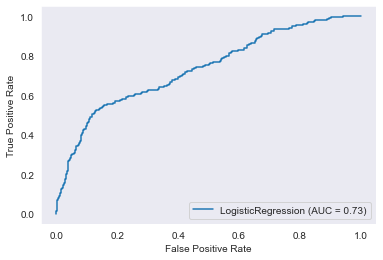

In [59]:
print('ROC-AUC Curve for the test set')
plot_roc_curve(classifier1, x_test, y_test)
plt.show()

In [60]:
# according to the metrics for logistic regression model it is good 
# for both test and trainig set beacuse ROC AUC score for both set 
# is approximately same. fairly commendable

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_test2 = classifier2.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred_test2)
print('accuracy score: ' ,accuracy)
print('ROC-AUC Score: ' + str(np.round(roc_auc_score(y_test, classifier2.predict_proba(x_test)[:,1]),3)))
cm  = confusion_matrix(y_test, y_pred_test2)
print('confusion matrix: \n', cm)

print('Classification Report: ')
print(classification_report(y_test, y_pred_test2))

accuracy score:  0.8325358851674641
ROC-AUC Score: 0.781
confusion matrix: 
 [[1264  168]
 [ 112  128]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1432
           1       0.43      0.53      0.48       240

    accuracy                           0.83      1672
   macro avg       0.68      0.71      0.69      1672
weighted avg       0.85      0.83      0.84      1672



In [ ]:
print('ROC-AUC Curve for the test set')
plot_roc_curve(classifier2, x_test, y_test)
plt.show()

In [ ]:
# AUC-ROC Score is best for random forest classifier. As the score is 
# 0.78 for test data but 1 for training data. When considering for 
# better predictions its best model

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier()
classifier3.fit(x_train, y_train)

In [ ]:
y_pred_test3 = classifier3.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test3)
print('accuracy score: ' ,accuracy)
print('ROC-AUC Score: ' + str(np.round(roc_auc_score(y_test, classifier3.predict_proba(x_test)[:,1]),3)))
cm  = confusion_matrix(y_test, y_pred_test3)
print('confusion matrix: \n', cm)

print('Classification Report: ')
print(classification_report(y_test, y_pred_test3))

In [ ]:
print('ROC-AUC Curve for the test set')
plot_roc_curve(classifier3, x_test, y_test)
plt.show()

In [ ]:
# Similar to the random forest model the scores for training data is
# a case of overfitting. the test score suggests that the model 
# prediction are not in the acceptable range.

# III. If we have to choose one model from the above 3 mentioned model we can go for random forest beacuse it has the best prediction as well as the cofusion metrics also supports the cause.

# IV. Features such as "international plan" and "number customer service calls" are the features of importance because they have a good positive correlation with Churn Indicator

In [ ]:
dftrain.corr()['Churn Indicator'].sort_values(ascending = False)

# V.  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

In [ ]:
y_pred_test_r = regressor.predict(x_test)

In [ ]:
y_pred_test_r_2

# here we can simply analyse the output and can say about from result i.e., predicted values from regression (y_predicted). If the values are close to 0 (in range of 0 to 0.2) the risk of churn is very low. While for the values near to 1 (in range 0.8 to 1) the risk of churn is very high. 

# ************************************************* Thank You******************************************************************